<a href="https://colab.research.google.com/github/Raghu010/Convolution-Neural-Network-applied-on-digit-datset/blob/master/CNN_digit_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, print_function, division, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
data, metadata = tfds.load('mnist', as_supervised= True, with_info= True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_dataset, test_dataset = data['train'], data['test']

In [0]:
data

{'test': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [0]:
print(metadata)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [0]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
num_train_data = metadata.splits['train'].num_examples
num_test_data = metadata.splits['test'].num_examples

In [0]:
train_dataset

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [0]:
test_dataset

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [0]:
print(num_train_data)

60000


In [0]:
print(num_test_data)

10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float64)
  images /= 255

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

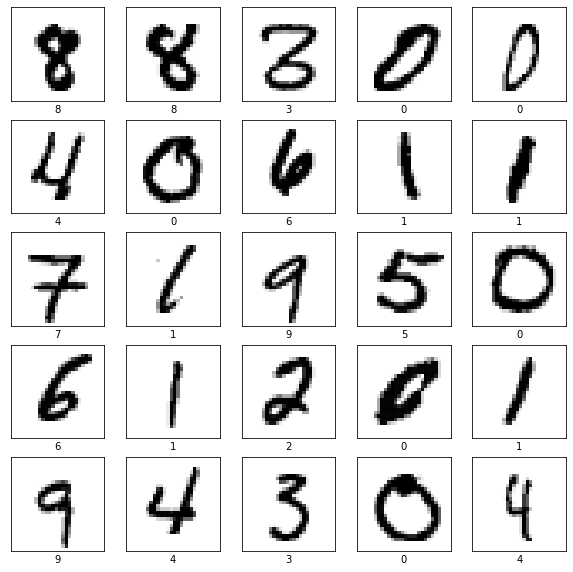

In [0]:
plt.figure(figsize = (10, 10))
i = 0
for images, labels in train_dataset.take(25):
  images = images.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images, cmap= plt.cm.binary)
  plt.xlabel(class_names[labels])
  i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding= 'same', activation= tf.nn.relu, input_shape = (28, 28, 1)),
                             tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                             tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
import math
model.fit(train_dataset, epochs = 2, steps_per_epoch= math.ceil(num_train_data/BATCH_SIZE))

Train for 1875 steps
Epoch 1/2
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1204 - accuracy: 0.9632
Epoch 2/2
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0398 - accuracy: 0.9882


In [0]:
test_loss, test_acc = model.evaluate(test_dataset, steps= math.ceil(num_test_data/BATCH_SIZE))
print(test_acc)
print(test_loss)

313/313 [==============================] - 6s 18ms/step - loss: 0.0301 - accuracy: 0.9907
0.9907
0.030103011594155616


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
predictions

array([[5.7345965e-11, 1.1698671e-09, 1.0000000e+00, 2.8662239e-08,
        6.1903913e-11, 3.1581649e-13, 1.3605910e-14, 9.4076844e-09,
        1.2384248e-08, 5.5291180e-14],
       [9.9998891e-01, 4.7770304e-10, 2.4016259e-07, 7.4875555e-09,
        4.3825583e-08, 1.8899584e-08, 3.3712854e-06, 6.6850895e-08,
        3.5003939e-06, 3.9233332e-06],
       [9.9999535e-01, 2.0520817e-10, 2.3261352e-07, 5.8418415e-08,
        4.5380819e-10, 4.3276959e-08, 2.4130449e-07, 9.1716768e-09,
        6.6351492e-07, 3.4449845e-06],
       [4.6214031e-12, 4.0789922e-14, 4.6919599e-08, 8.7557721e-09,
        1.9649626e-13, 9.4541646e-09, 1.5237635e-10, 7.3369536e-15,
        9.9999988e-01, 1.3466345e-09],
       [9.6176620e-08, 9.9997914e-01, 5.0630410e-06, 2.6440161e-09,
        5.2341315e-06, 1.2592410e-07, 3.9145718e-08, 5.2726282e-06,
        4.6590590e-06, 3.2788844e-07],
       [3.0975991e-10, 5.3931331e-09, 5.8362604e-10, 5.9696234e-08,
        2.5022787e-04, 3.3527982e-07, 2.5304673e-11, 7.36

In [0]:
predictions[0]

array([5.7345965e-11, 1.1698671e-09, 1.0000000e+00, 2.8662239e-08,
       6.1903913e-11, 3.1581649e-13, 1.3605910e-14, 9.4076844e-09,
       1.2384248e-08, 5.5291180e-14], dtype=float32)

In [0]:
np.argmax(predictions[0])

2

In [0]:
test_labels[0]

2

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

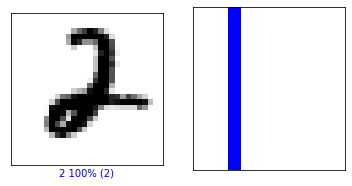

In [0]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)